In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from modules.training_and_fine_tuning.training.train_cnn_model_using_feature_statistics import CnnModelUsingFeatureStatistics
from modules.training_and_fine_tuning.utils.feature_statistics_data_utils import DataUtils
from config.vi_config import VietnameseDatasetConfig
from modules.training_and_fine_tuning.utils.model_utils import ModelUtilities

In [2]:
def get_n_mfcc_paths(n_mfcc, Config):
    train_path = Config.n_mfcc_config[n_mfcc].train_path
    validation_path = Config.n_mfcc_config[n_mfcc].validation_path
    test_path = Config.n_mfcc_config[n_mfcc].test_path
    return train_path, validation_path, test_path

In [3]:
n_mfcc = 26
train_file_path, test_file_path, val_file_path = get_n_mfcc_paths(n_mfcc, VietnameseDatasetConfig)
print(train_file_path, test_file_path, val_file_path )
x_traincnn, y_train, x_valcnn, y_val, x_testcnn, y_test, scaler = DataUtils.prepare_data(train_file_path, test_file_path, val_file_path)

D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/train.csv D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/validation.csv D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/test.csv


In [4]:
import joblib
def save_scaler(scaler):
    joblib.dump(scaler, 'scaler.pkl')

save_scaler(scaler)

In [5]:
x_traincnn.shape

(870, 310, 1)

In [6]:
x_testcnn.shape

(207, 310, 1)

In [7]:
cnn_model_statistics = ModelUtilities.load_model(f'models/cnn_model_using_feature_statistics_with_{n_mfcc}_n_mfcc.keras')

In [8]:
num_layers_to_unfreeze = 5
for layer in cnn_model_statistics.layers[-num_layers_to_unfreeze:]:
    layer.trainable = True

In [9]:
cnn_model_statistics.compile(optimizer=Adam(learning_rate=0.00008), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
cnn_model_statistics.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 310, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 310, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 310, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 310, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 155, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 155, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 155, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 155, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 155, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 155, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 78, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 78, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4992)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     1,278,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,369,351 (5.22 MB)

 Trainable params: 1,368,071 (5.22 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [15]:
import numpy as np
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Assuming y_train, y_val, x_traincnn, x_valcnn, and cnn_model_statistics are already defined

# Ensure y_train is a flat array
y_train_flat = np.array(y_train).flatten()

# Compute class weights to handle imbalanced classes
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_flat),  # Ensure classes is a list of unique labels
    y=y_train_flat
)

# Convert the class weights to a dictionary format required by the fit method
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Initialize callbacks
model_checkpoint = ModelCheckpoint(
    'fine_tuned_model_using_feature_statistics.keras', 
    monitor='val_accuracy', 
    save_best_only=True
)
early_stop = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    patience=7, 
    restore_best_weights=True
)
lr_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=1e-6
)

# Train the model with class weights and callbacks
history = cnn_model_statistics.fit(
    x_traincnn, 
    y_train, 
    epochs=100, 
    validation_data=(x_valcnn, y_val), 
    batch_size=32, 
    callbacks=[model_checkpoint, early_stop, lr_reduction], 
    class_weight=class_weights_dict
)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3500 - loss: 2.9421 - val_accuracy: 0.4910 - val_loss: 1.7947 - learning_rate: 8.0000e-05
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5636 - loss: 1.5451 - val_accuracy: 0.4910 - val_loss: 1.6290 - learning_rate: 8.0000e-05
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6104 - loss: 1.2004 - val_accuracy: 0.5449 - val_loss: 1.5047 - learning_rate: 8.0000e-05
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7286 - loss: 0.8675 - val_accuracy: 0.5988 - val_loss: 1.3627 - learning_rate: 8.0000e-05
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7749 - loss: 0.6514 - val_accuracy: 0.6527 - val_loss: 1.3057 - learning_rate: 8.0000e-05
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8000 - loss: 0.5180 - val_accuracy: 0.6587 - val_loss: 1.2507 - learning_rate: 8.0000e-05
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 

In [16]:
loss, accuracy = cnn_model_statistics.evaluate(x_testcnn, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6958 - loss: 0.9236 
Test Loss: 0.8594291806221008, Test Accuracy: 0.7198067903518677


In [17]:
history_dict = history.history
print(history_dict)

{'accuracy': [0.38275861740112305, 0.5609195232391357, 0.636781632900238, 0.7390804886817932, 0.777011513710022, 0.8022988438606262, 0.863218367099762, 0.8643678426742554, 0.8977011442184448, 0.9137930870056152, 0.9137930870056152, 0.9333333373069763, 0.9425287246704102, 0.9402298927307129, 0.9494252800941467, 0.9505746960639954, 0.9586206674575806, 0.9563218355178833, 0.9505746960639954, 0.9620689749717712, 0.959770143032074, 0.9505746960639954, 0.9620689749717712, 0.9678161144256592, 0.9505746960639954, 0.9620689749717712, 0.9620689749717712, 0.9551724195480347, 0.9528735876083374, 0.9528735876083374, 0.9586206674575806, 0.9563218355178833, 0.9666666388511658, 0.9586206674575806], 'loss': [2.850903272628784, 1.6087514162063599, 1.1099692583084106, 0.7845083475112915, 0.673559844493866, 0.5183368921279907, 0.3969486653804779, 0.3911237418651581, 0.32453653216362, 0.2814422845840454, 0.27539366483688354, 0.21961206197738647, 0.21922855079174042, 0.19324205815792084, 0.18333788216114044

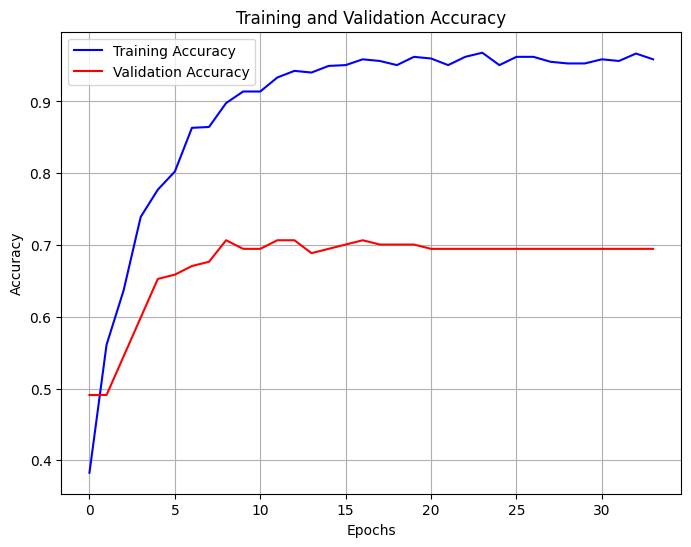

In [18]:
ModelUtilities.plot_training_history(history_dict)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


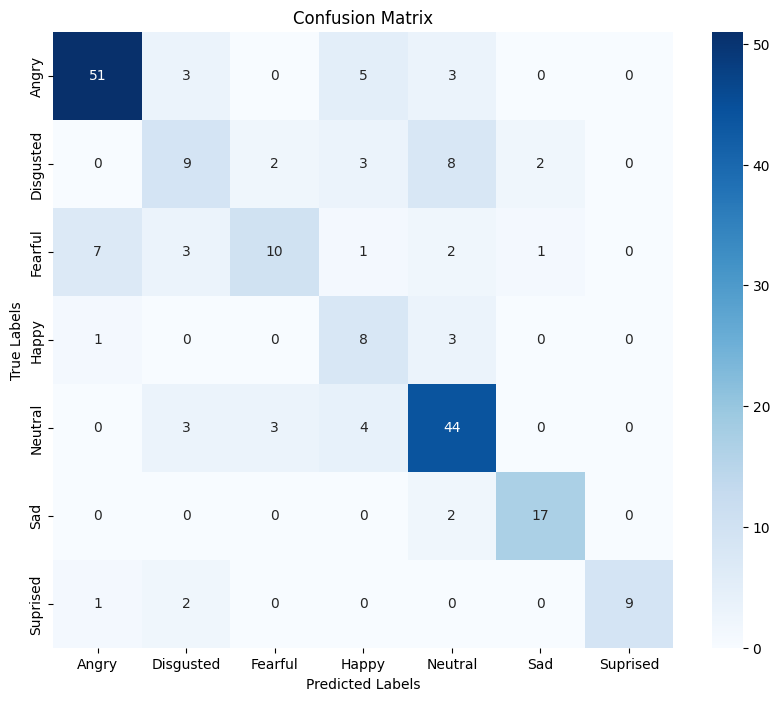

In [ ]:
ModelUtilities.plot_confusion_matrix(cnn_model_statistics, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


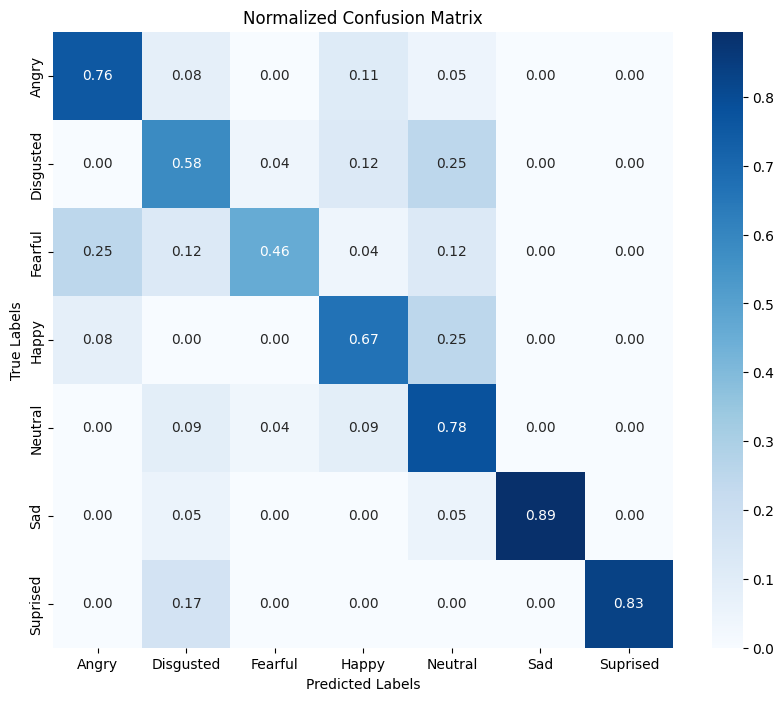

In [19]:
ModelUtilities.plot_confusion_matrix_normalized(cnn_model_statistics, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])